<a href="https://colab.research.google.com/github/oumaimaelharti/Projet-Machine-Learning/blob/main/Projet_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Charger le dataset
data = pd.read_csv("StudentsPerformance.csv")


In [3]:
# Afficher les premières lignes du dataset
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
# Vérifier les types de données et les valeurs manquantes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [5]:
# Encodage des variables catégorielles
data = pd.get_dummies(data, drop_first=True)

In [6]:
# Séparer les caractéristiques (features) et la variable cible (target)
X = data.drop(['math score'], axis=1)
y = data['math score']

In [7]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Statistiques descriptives
print(data.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


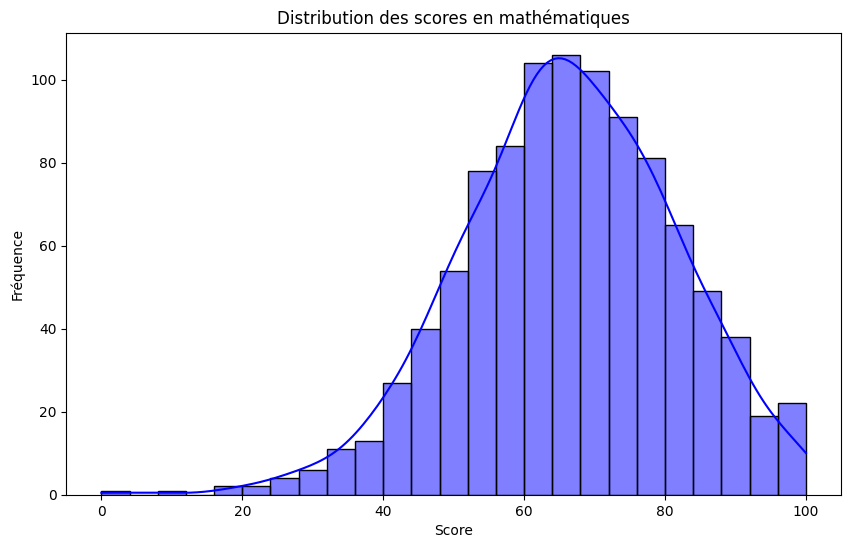

In [10]:
# Visualisation des distributions de scores
plt.figure(figsize=(10, 6))
sns.histplot(data['math score'], kde=True, color='blue')
plt.title('Distribution des scores en mathématiques')
plt.xlabel('Score')
plt.ylabel('Fréquence')
plt.show()

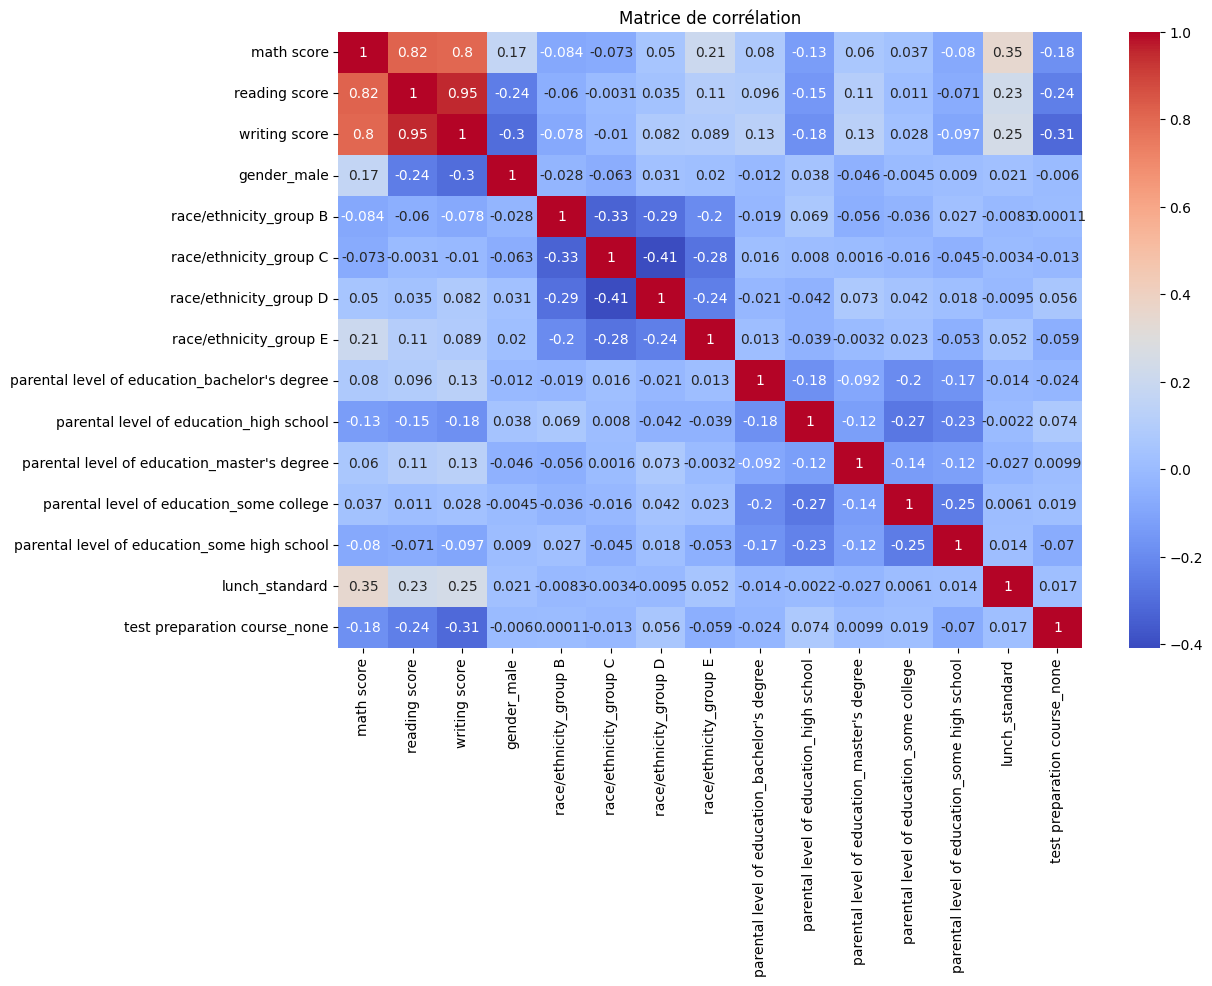

In [11]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [12]:
# Entraîner un modèle de régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [13]:
# Entraîner un modèle de forêt aléatoire
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [14]:
# Évaluation des modèles
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R2: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, R2: {r2_rf}")

Linear Regression - MSE: 29.095169866715466, RMSE: 5.3939938697328405, R2: 0.8804332983749565
Random Forest - MSE: 36.607852759212015, RMSE: 6.050442360622239, R2: 0.8495599019340474


In [15]:
# Comparaison des performances
models = ['Linear Regression', 'Random Forest']
mse_values = [mse_lr, mse_rf]
rmse_values = [rmse_lr, rmse_rf]
r2_values = [r2_lr, r2_rf]

In [16]:
comparison_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R2 Score': r2_values
})

print(comparison_df)

               Model        MSE      RMSE  R2 Score
0  Linear Regression  29.095170  5.393994  0.880433
1      Random Forest  36.607853  6.050442  0.849560
